In [33]:
import math
import numpy as np
import numpy.matlib as ml
import time


def geometric_brownian_motion(allow_negative=False, **kwargs, q = False):
    """
        Geometric Brownian Motion
        Step 1 - Calculate the Deterministic component - drift
        Alternative drift 1 - supporting random walk theory
        drift = 0
        Alternative drift 2 -
        drift = risk_free_rate - (0.5 * sigma**2)
        :return: asset path
    """

    starting_value = kwargs.get('starting_value')
    mu = kwargs.get('mu')
    sigma = kwargs.get('sigma')
    num_trading_days = kwargs.get('num_trading_days')
    num_per = kwargs.get('forecast_period_in_days')

    # Calculate Drift
    mu = mu / num_trading_days
    sigma = sigma / math.sqrt(num_trading_days)  # Daily volatility
    drift = mu - (0.5 * sigma ** 2)

    # Calculate Random Shock
    random_shock = np.random.normal(0, 1, (1, num_per))
    log_ret = drift + (sigma * random_shock)

    compounded_ret = np.cumsum(log_ret, axis=1)
    asset_path = starting_value + (starting_value * compounded_ret)

    # Include starting value
    starting_value = ml.repmat(starting_value, 1, 1)
    asset_path = np.concatenate((starting_value, asset_path), axis=1)

    if allow_negative:
        asset_path *= (asset_path > 0)

    return asset_path


def monte_carlo_simulation(num_sims, model, **kwargs):
    """
    Monte Carlo Simulator
    :param num_sims: Number of iterations
    :param model: function to be iterated
    :param kwargs: keyword arguments
    :return: yield generator object
    """

    for n_sim in range(num_sims):
        yield model(**kwargs)


if __name__ == "__main__":
    # Input Parameters
    num_simulations = 100000 # 1 MILLION
    starting_value = 100
    mu = 0.18
    sigma = 0.12
    forecast_period_in_days = 365
    num_trading_days = 250

    start_time = time.time()
    asset_paths = monte_carlo_simulation(num_simulations, geometric_brownian_motion, starting_value=starting_value,
                                         mu=mu, sigma=sigma, forecast_period_in_days=forecast_period_in_days,
                                         num_trading_days=num_trading_days)

    print(next(asset_paths))
    print(f"{(time.time() - start_time)} seconds")

[[100.          99.4940534   99.81063666 100.55084731 101.14160703
   98.89112344  97.3318728   97.72488849  97.41395701  97.37900437
   96.11753585  96.47408914  95.48571227  96.13241783  96.35090811
   96.75992656  96.55852924  98.01745301  98.18232245  98.74966011
   97.39054864  99.07738637  99.09391985  98.33366421  98.7614801
   98.52469534  98.64596062  97.38705161  97.63641412  97.4766991
   96.5702239   97.17399418  98.86750398  97.58683759  97.7545872
   98.47953966  97.85322479  97.75196458  97.95560309  98.68812543
   99.30561019  98.30589909  97.42022016  98.80925772  98.86537608
   99.11470748  99.43216999  99.10155883 100.26418902 100.23256132
  100.54801411 100.4536432  100.91619636 100.46914912 101.54635328
  100.53560657 101.4192206  100.83705698 101.3861597  101.90463134
  102.30059017 102.8829854  102.47817491 101.7767016  103.12660579
  102.21388711 102.5783826  103.56340301 104.4643597  103.59971027
  103.65936568 102.77501044 100.66909589 100.89380703 101.2045856

In [42]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

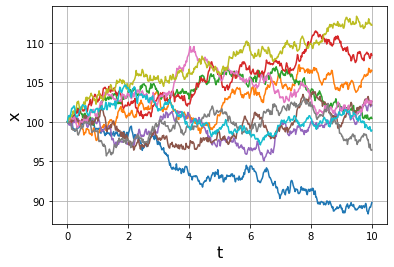

In [50]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 10
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 100

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [ ]:
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """
